<a href="https://colab.research.google.com/github/kanishquetyagi/Hotel_Booking_Analysis/blob/main/Hotel_Booking_Analysis_Capstone_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## <b> Have you ever wondered when the best time of year to book a hotel room is? Or the optimal length of stay in order to get the best daily rate? What if you wanted to predict whether or not a hotel was likely to receive a disproportionately high number of special requests? This hotel booking dataset can help you explore those questions!

## <b>This data set contains booking information for a city hotel and a resort hotel, and includes information such as when the booking was made, length of stay, the number of adults, children, and/or babies, and the number of required parking spaces, among other things. All personally identifying information has been removed from the data. </b>

## <b> Explore and analyze the data to discover important factors that govern the bookings. </b>

In [1]:
import pandas as pd
from sklearn.impute import SimpleImputer
import numpy as np
pd.options.mode.chained_assignment = None  # default='warn'
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
# import folium

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
# import the csv file as a DataFrame
working_dir_path = '/content/drive/MyDrive/AlmaBetter/Module 1/capastone/Hotel Bookings.csv'
df = pd.read_csv(working_dir_path)

# Introduction Regarding the given Dataset

This data article describes two datasets with Hotel demand data. One of the hotels (H1) is Resort Hotel and the other is City Hotel (H2). Both datasets share the same structure, with 31 variables describing the 40,060 observations of H1 and 79,330 observations of H2. Each observation represents a hotel booking. Both datasets comprehend bookings due to arrive between the 1st of July of 2015 and the 31st of August 2017, including bookings that effectively arrived and bookings that were canceled. Since this is hotel real data, all data elements pertaining hotel or costumer identification were deleted.

*Both Datasets H1 and H2 are combined to form this Dataset*

* **Data source location** --	Both hotels are located in Portugal: H1 at the resort region of Algarve and H2 at the city of Lisbon.

* Distance between Algarve(Faro) from Lisbon is 173 miles ( 280 km)

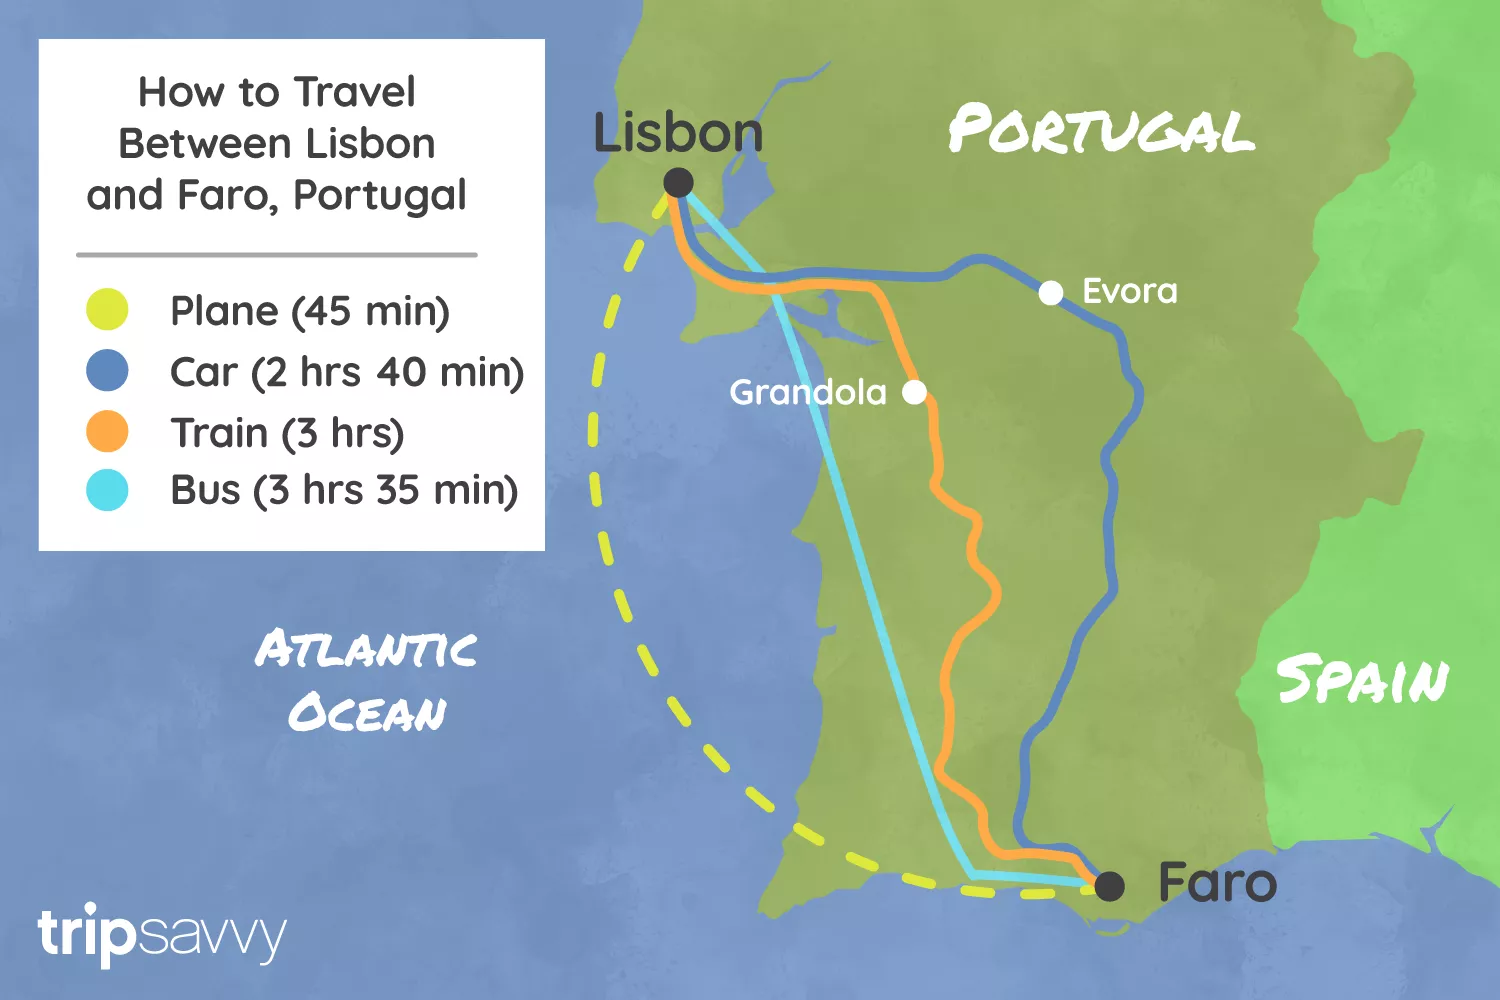

## Column Names and their meanings

* **hotel**: hotel type(H1 = Resort Hotel or H2 = City Hotel)
* **is_canceled**: Value indicating if the booking was canceled (1) or not (0)
* **lead_time**: Number of days that elapsed between the entering date of the booking into the PMS and the arrival date
* **arrival_date_year**: Year of arrival date
* **arrival_date_month**: Month of arrival date
* **arrival_date_week_number**: Week number of year for arrival date
* **arrival_date_day_of_month**: Day of arrival date
* **stays_in_weekend_nights**: Number of weekend nights (Saturday or Sunday) the guest stayed or booked to stay at the hotel
* **stays_in_week_nights**: Number of week nights (Monday to Friday) the guest stayed or booked to stay at the hotel
* **adults**: Number of adults
* **children**: Number of children
* **babies**: Number of babies
* **meal**: Type of meal booked. Categories are presented in standard hospitality  meal packages:  

  1.   Undefined/SC – No Meal package
  2.   BB – Bed & Breakfast
  3.   HB – Half board (breakfast and one other meal – usually dinner)
  4.   FB – Full board (breakfast, lunch and dinner)

* **country**: Country of origin. Categories are represented in the ISO 3155–3:2013 format.
* **market_segment**: Market segment designation. In categories, the term “TA” means “Travel Agents” and “TO” means “Tour Operators”.
* **distribution_channel**: Booking distribution channel. The term “TA” means “Travel Agents” and “TO” means “Tour Operators”.
* **is_repeated_guest**: Value indicating if the booking name was from a repeated guest (1) or not (0)
* **previous_cancellations**: Number of previous bookings that were cancelled by the customer prior to the current booking
* **previous_bookings_not_canceled**: Number of previous bookings not cancelled by the customer prior to the current booking.
reserved_room_type: Code of room type reserved. Code is presented instead of designation for anonymity reasons.
* **assigned_room_type**: Code for the type of room assigned to the booking. Sometimes the assigned room type differs from the reserved room type due to hotel operation reasons (e.g. overbooking) or by customer request. Code is presented instead of designation for anonymity reasons.
* **booking_changes**: Number of changes/amendments made to the booking from the moment the booking was entered on the PMS until the moment of check-in or cancellation.
* **deposit_type**: Indication on if the customer made a deposit to guarantee the booking. This variable can assume three categories: 
  1. No Deposit – no deposit was made 
  2. Non Refund – a deposit was made in the value of the total stay cost  
  3. Refundable – a deposit was made with a value under the total cost of stay.
* **agent**: ID of the travel agency that made the booking
* **company**: ID of the company/entity that made the booking or responsible for paying the booking. ID is presented instead of designation for anonymity reasons.
* **days_in_waiting_list**: Number of days the booking was in the waiting list before it was confirmed to the customer.
* **customer_type**: Type of booking, assuming one of four categories: 
  1. Contract - when the booking has an allotment or other type of contract associated to it 
  2. Group – when the booking is associated to a group 
  3. Transient – when the booking is not part of a group or contract, and is not associated to other transient booking 
  4. Transient-party – when the booking is transient, but is associated to at least other transient booking.
* **adr**: Average Daily Rate as defined by dividing the sum of all lodging transactions by the total number of staying nights.
(measures the average rental revenue earned for an occupied room per day. The operating performance of a hotel or other lodging business can be determined by using the ADR. Multiplying the ADR by the occupancy rate equals the revenue per available room.)
* **required_car_parking_spaces**: Number of car parking spaces required by the customer
* **total_of_special_requests**: Number of special requests made by the customer (e.g. twin bed or high floor)
* **reservation_status**: Reservation last status, assuming one of three categories: 
  1. Canceled – booking was canceled by the customer 
  2. Check-Out – customer has checked in but already departed 
  3. No-Show – customer did not check-in and did inform the hotel of the reason why.
* **reservation_status_date**: Date at which the last status was set. This variable can be used in conjunction with the ReservationStatus to understand when was the booking canceled or when did the customer checked-out of the hotel.

# Basic Data Inspection and Cleaning

In [4]:
# top five rows
df.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,C,C,3,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,C,C,4,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,0.0,0,BB,GBR,Direct,Direct,0,0,0,A,C,0,No Deposit,NaN,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,0.0,0,BB,GBR,Corporate,Corporate,0,0,0,A,A,0,No Deposit,304.0,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,0.0,0,BB,GBR,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,240.0,NaN,0,Transient,98.0,0,1,Check-Out,2015-07-03


In [5]:
# bottom five rows
df.tail()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
119385,City Hotel,0,23,2017,August,35,30,2,5,2,0.0,0,BB,BEL,Offline TA/TO,TA/TO,0,0,0,A,A,0,No Deposit,394.0,NaN,0,Transient,96.14,0,0,Check-Out,2017-09-06
119386,City Hotel,0,102,2017,August,35,31,2,5,3,0.0,0,BB,FRA,Online TA,TA/TO,0,0,0,E,E,0,No Deposit,9.0,NaN,0,Transient,225.43,0,2,Check-Out,2017-09-07
119387,City Hotel,0,34,2017,August,35,31,2,5,2,0.0,0,BB,DEU,Online TA,TA/TO,0,0,0,D,D,0,No Deposit,9.0,NaN,0,Transient,157.71,0,4,Check-Out,2017-09-07
119388,City Hotel,0,109,2017,August,35,31,2,5,2,0.0,0,BB,GBR,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,89.0,NaN,0,Transient,104.40,0,0,Check-Out,2017-09-07
119389,City Hotel,0,205,2017,August,35,29,2,7,2,0.0,0,HB,DEU,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,9.0,NaN,0,Transient,151.20,0,2,Check-Out,2017-09-07


In [6]:
# shape and size of the given data
print(f'the shape of the df is : {df.shape}') 
print(f'the size of the df is  : {df.size}')

the shape of the df is : (119390, 32)
the size of the df is  : 3820480


In [7]:
#  info regarding all rows
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 32 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  object 
 1   is_canceled                     119390 non-null  int64  
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_year               119390 non-null  int64  
 4   arrival_date_month              119390 non-null  object 
 5   arrival_date_week_number        119390 non-null  int64  
 6   arrival_date_day_of_month       119390 non-null  int64  
 7   stays_in_weekend_nights         119390 non-null  int64  
 8   stays_in_week_nights            119390 non-null  int64  
 9   adults                          119390 non-null  int64  
 10  children                        119386 non-null  float64
 11  babies                          119390 non-null  int64  
 12  meal            

In [8]:
# dataset summary statistics (count,mean,std,min etc) – Integer and numeric variables.
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
is_canceled,119390.0,0.370416,0.482918,0.00,0.00,0.000,1.0,1.0
lead_time,119390.0,104.011416,106.863097,0.00,18.00,69.000,160.0,737.0
arrival_date_year,119390.0,2016.156554,0.707476,2015.00,2016.00,2016.000,2017.0,2017.0
arrival_date_week_number,119390.0,27.165173,13.605138,1.00,16.00,28.000,38.0,53.0
arrival_date_day_of_month,119390.0,15.798241,8.780829,1.00,8.00,16.000,23.0,31.0
stays_in_weekend_nights,119390.0,0.927599,0.998613,0.00,0.00,1.000,2.0,19.0
stays_in_week_nights,119390.0,2.500302,1.908286,0.00,1.00,2.000,3.0,50.0
adults,119390.0,1.856403,0.579261,0.00,2.00,2.000,2.0,55.0
children,119386.0,0.103890,0.398561,0.00,0.00,0.000,0.0,10.0
babies,119390.0,0.007949,0.097436,0.00,0.00,0.000,0.0,10.0


In [10]:
# find all the categorical features
#initialize empty list to store categorical features
descriptive_cols = []

#iterating through each features and checking its value type
#store each columns not having numeric values in discriptive_cols list
for col in list(df.columns):
  if col not in list(df.describe().columns):
    descriptive_cols.append(col)

In [11]:
# dataset summary statistics – Categorical variables.
# transpose to interchange rows to columns and vice-versa
df[descriptive_cols].describe().transpose()

,count,unique,top,freq
hotel,119390,2,City Hotel,79330
arrival_date_month,119390,12,August,13877
meal,119390,5,BB,92310
country,118902,177,PRT,48590
market_segment,119390,8,Online TA,56477
distribution_channel,119390,5,TA/TO,97870
reserved_room_type,119390,10,A,85994
assigned_room_type,119390,12,A,74053
deposit_type,119390,3,No Deposit,104641
customer_type,119390,4,Transient,89613


## **DATA CLEANING**

In [12]:
#checking null values in each feature
df.isnull().sum()

hotel                                  0
is_canceled                            0
lead_time                              0
arrival_date_year                      0
arrival_date_month                     0
arrival_date_week_number               0
arrival_date_day_of_month              0
stays_in_weekend_nights                0
stays_in_week_nights                   0
adults                                 0
children                               4
babies                                 0
meal                                   0
country                              488
market_segment                         0
distribution_channel                   0
is_repeated_guest                      0
previous_cancellations                 0
previous_bookings_not_canceled         0
reserved_room_type                     0
assigned_room_type                     0
booking_changes                        0
deposit_type                           0
agent                              16340
company         

In [13]:
#get all columns having atleast 1 null value
null_values= df.isnull().sum().sort_values(ascending=False)
null_values[null_values>0]

company     112593
agent        16340
country        488
children         4
dtype: int64

In [14]:
#make a copy of original dataframe
df_hotel=df.copy() 

In [15]:
#Dropping the Company column since it has more than 80 % Null Values 
df_hotel.drop('company',inplace=True,axis=1)

In [17]:
# fill Null values  in children and agents columns with median values
imputer=SimpleImputer(missing_values=np.nan,strategy='median')
imputer.fit(df_hotel[['children','agent']])
df_hotel[['children','agent']]=imputer.transform(df_hotel[['children','agent']])

In [18]:
#For country take mode in place of Null values
df_hotel['country'].fillna(str(df_hotel['country'].mode().values[0]),inplace=True)

In [19]:
#Checking the Null Values after cleaning 
null_values= df_hotel.isnull().sum().sort_values(ascending=False)
null_values[null_values>0]

Series([], dtype: int64)

# **EDA**

In [20]:
#function to get percentage of unique values in features
def get_percentage(Column,limit=None):

    Column = Column.value_counts()[:limit]
    
    #get index of column
    x = Column.index
    
    #percentage of unique values in column
    y = Column/Column.sum()*100
    
    #return x,y values respectively
    return x.values,y.values

Text(0.5, 1.0, 'Bookings Distribution ')

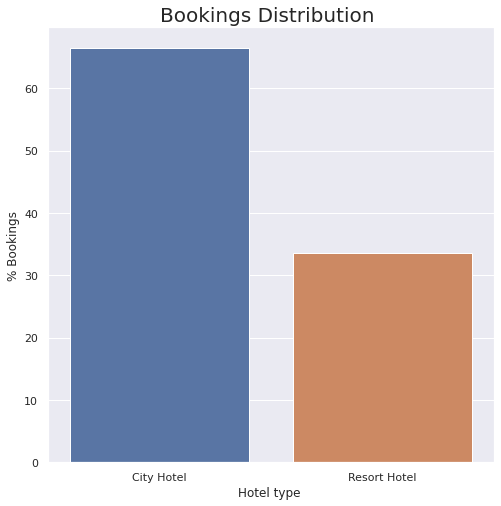

In [21]:
# distribution percentage of hotel
values,percentage = get_percentage(df_hotel['hotel'])

#setting figure size
plt.figure(figsize=(8,8))
sns.set_theme(style="darkgrid",font='sans-serif')

#plot bar chart for booking distribution among hotels
ax = sns.barplot(x=values,y= percentage,data=df_hotel)
plt.xlabel("Hotel type ", fontsize=12)
plt.ylabel("% Bookings", fontsize=12)
plt.title("Bookings Distribution ", fontsize=20)

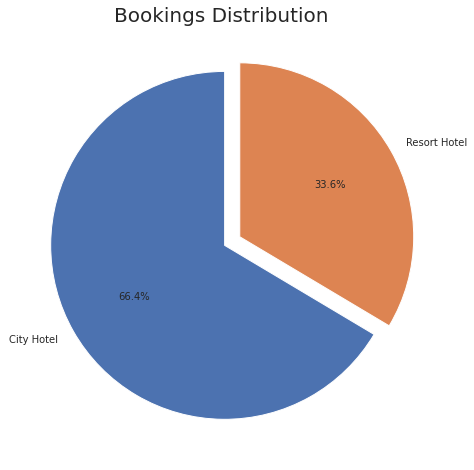

In [22]:
#get required data to plot pie chart for booking percentage in hotels
labels = df_hotel['hotel'].value_counts().index.tolist()
sizes = df_hotel['hotel'].value_counts().tolist()

#set figure size and theme
plt.figure(figsize=(15,8))
sns.set_theme(style="darkgrid",font='sans-serif')
explode = (0, 0.1)

#booking percentage in hotels pie chart
plt.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%',startangle=90, textprops={'fontsize': 10})
plt.title("Bookings Distribution ", fontsize=20)
plt.show()



## **Cancellation analysis**


Text(0, 0.5, 'No. of Bookings')

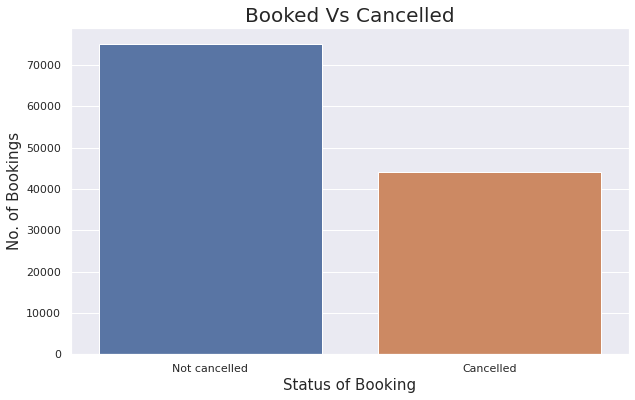

In [25]:
# is_canceled Bar Plot
# plt.figure(figsize=(5,2))
cancelled_df = df_hotel['is_canceled'].value_counts().reset_index()
plt.figure(figsize=(10,6))
sns.barplot(x=['Not cancelled', 'Cancelled'], y=cancelled_df['is_canceled']).set_title('Booked Vs Cancelled', fontsize= '20')
sns.set_theme(style="darkgrid",font='sans-serif')
plt.xlabel('Status of Booking', fontsize='15')
plt.ylabel('No. of Bookings', fontsize='15')

In [26]:
#filter not cancelled bookings
df_not_canceled = df_hotel[df_hotel['is_canceled'] == 0]

#filter cancelled bookings
df_is_canceled = df_hotel[df_hotel['is_canceled'] == 1]

#cancelled bookings in each hotel
series= df_is_canceled['hotel'].value_counts()
hotel_type = series.index

#percentage of cancelled booking in hotels
count_percent_cancellation = series.values/series.values.sum()*100

Text(0.5, 1.0, 'Cancellation Distribution ')

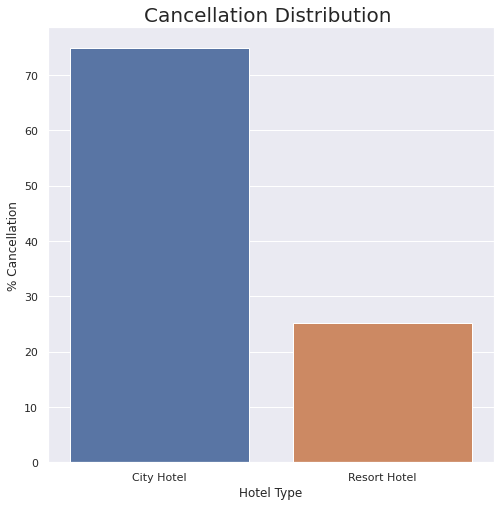

In [28]:
# distribution percentage of hotel which saw cancellations 
plt.figure(figsize=(8,8))
sns.set_theme(style="darkgrid",font='sans-serif')

#plot bar chart for cancellation percentage in hotels
ax = sns.barplot(x=hotel_type,y=count_percent_cancellation)
plt.ylabel("% Cancellation", fontsize=12)
plt.xlabel("Hotel Type", fontsize=12)
plt.title("Cancellation Distribution ", fontsize=20)

Text(0.5, 1.0, ' Bookings and Cancellation Distribution/ Hotel Type ')

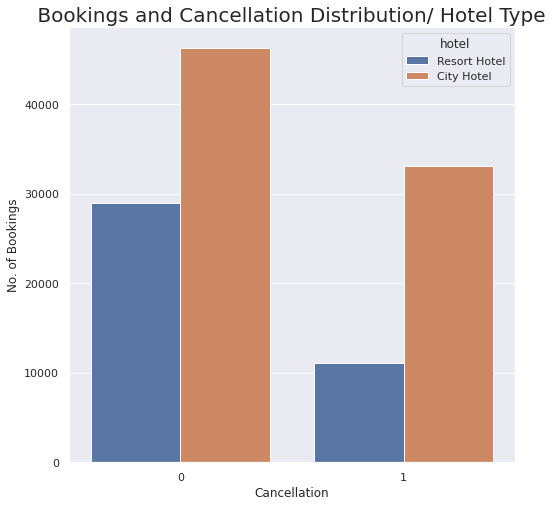

In [32]:
#cancellation in hotel type
# 0 - not cancelled, 1- is cancelled
#plot bar chart to compare cancelled and not canecelled booking in hotels
plt.figure(figsize=(8,8))
sns.set_theme(style="darkgrid",font='sans-serif')
ax = sns.countplot(x="is_canceled", hue ='hotel',data=df_hotel)
plt.xlabel("Cancellation", fontsize=12)
plt.ylabel("No. of Bookings", fontsize=12)
plt.title(" Bookings and Cancellation Distribution/ Hotel Type ", fontsize=20)

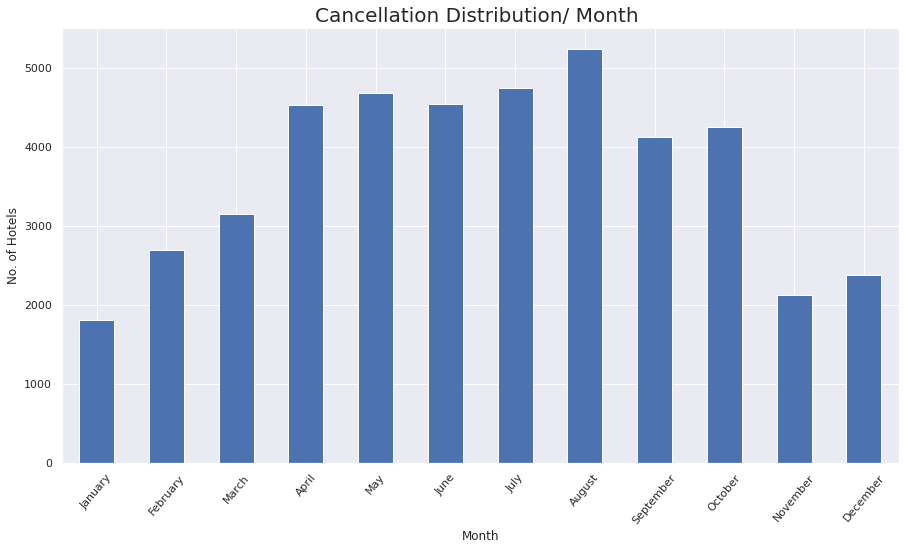

In [33]:
#plot bar chart for monthly cancellations 
new_order=['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']

monthly_cancellation = df_hotel.groupby("arrival_date_month")["is_canceled"].sum()
monthly_cancellation = monthly_cancellation.reindex(new_order)
monthly_cancellation

plt.figure(figsize=(15,8))
ax= monthly_cancellation.plot.bar(rot=50)
plt.xlabel("Month",fontsize=12)
plt.ylabel("cancellations",fontsize=12)
plt.ylabel("No. of Hotels", fontsize=12)
plt.title("Cancellation Distribution/ Month ", fontsize=20)
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



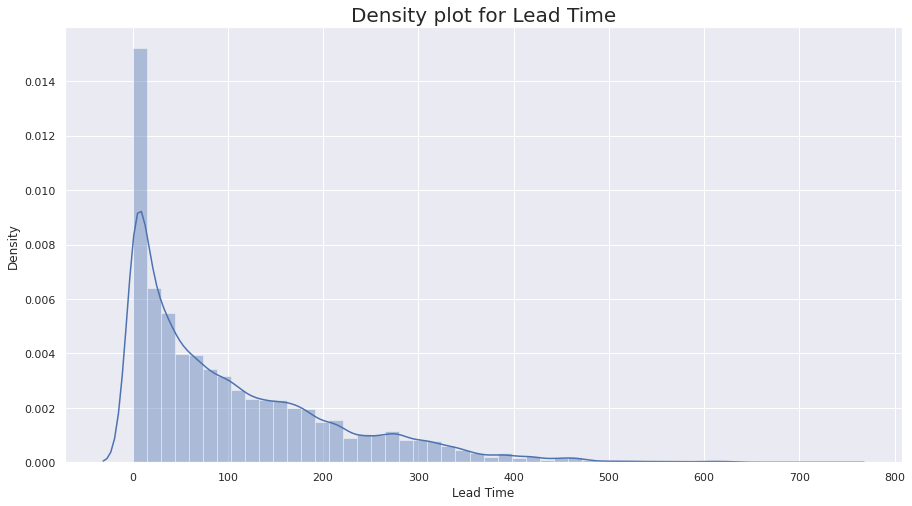

In [34]:
#plot Density Lead Time
plt.figure(figsize=(15,8))
sns.distplot(df_hotel['lead_time']).set_title('Density plot for Lead Time', fontsize=20)
sns.set_theme(style="darkgrid",font='sans-serif')
plt.xlabel('Lead Time', fontsize=12)
plt.ylabel('Density', fontsize=12)
plt.show()

<h3>Summary:<br> </h3>
Density plot for lead time Graph is positively skewed, and most of the values lies between 0-50, which restricted the mean value to 104.

In [36]:
# cancelled bookings statistical summary
df10=df_hotel[df_hotel['is_canceled']==1]['lead_time'].describe().reset_index().rename(columns={'lead_time':'lead_time when booking canceled'})
df20=df_hotel[df_hotel['is_canceled']==0]['lead_time'].describe().reset_index().rename(columns={'lead_time':'lead_time when not cancelled'})
lead_time_df = pd.merge(df10,df20,how='outer', on='index')

lead_time_df['Percent change']=(lead_time_df['lead_time when booking canceled']-lead_time_df['lead_time when not cancelled'])/lead_time_df['lead_time when not cancelled']*100
lead_time_df
# We can see that mean lead time for cancelled booking was 90% higher than not cancelled
# Which leads to the conclusion that people who booked hotels more than 4 months prior have more chances of getting cancelled than hotels booked within a month. 

,index,lead_time when booking canceled,lead_time when not cancelled,Percent change
0,count,44224.000000,75166.000000,-41.164888
1,mean,144.848815,79.984687,81.095682
2,std,118.624829,91.109888,30.199731
3,min,0.000000,0.000000,NaN
4,25%,48.000000,9.000000,433.333333
5,50%,113.000000,45.000000,151.111111
6,75%,214.000000,124.000000,72.580645
7,max,629.000000,737.000000,-14.654003


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



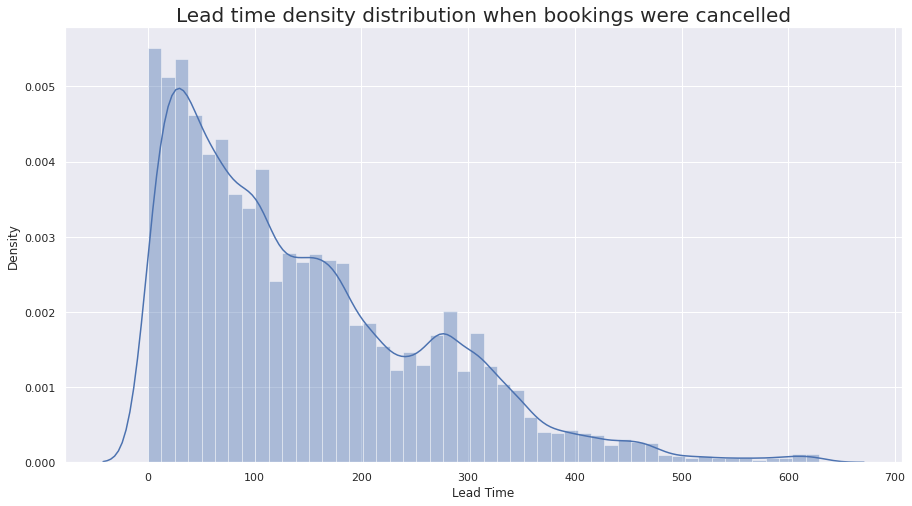

In [35]:
#plot graph for Lead time density distribution when bookings were cancelled
plt.figure(figsize=(15,8))
sns.distplot(df_hotel[df_hotel['is_canceled']==1]['lead_time']).set_title('Lead time density distribution when bookings were cancelled', fontsize=20)
sns.set_theme(style="darkgrid",font='sans-serif')
plt.xlabel('Lead Time', fontsize=12)
plt.ylabel('Density', fontsize=12)
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



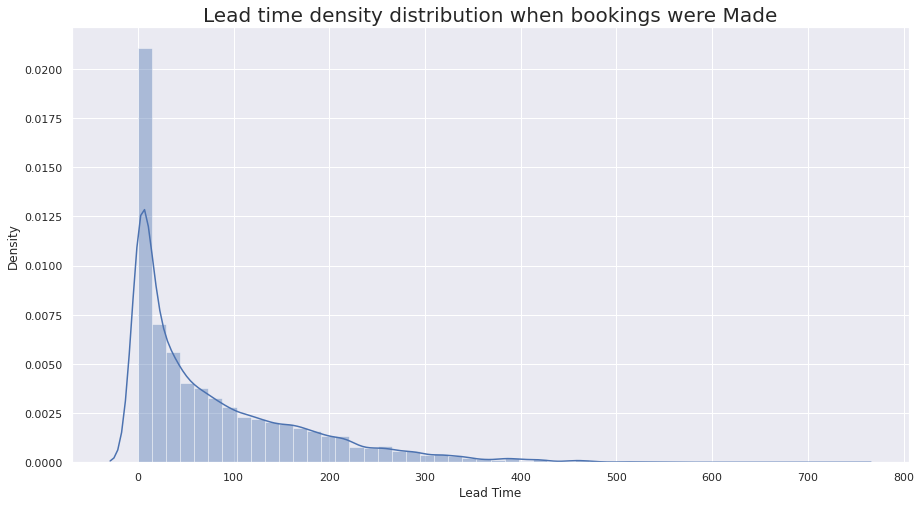

In [38]:
plt.figure(figsize=(15,8))
sns.distplot(df_hotel[df_hotel['is_canceled']==0]['lead_time']).set_title('Lead time density distribution when bookings were Made', fontsize=20)
sns.set_theme(style="darkgrid",font='sans-serif')
plt.xlabel('Lead Time', fontsize=12)
plt.ylabel('Density', fontsize=12)
plt.show()

# After analyzing both density distribution we can see that lead time of cancelled bookings was more scattered than bookings which were not cancelled.

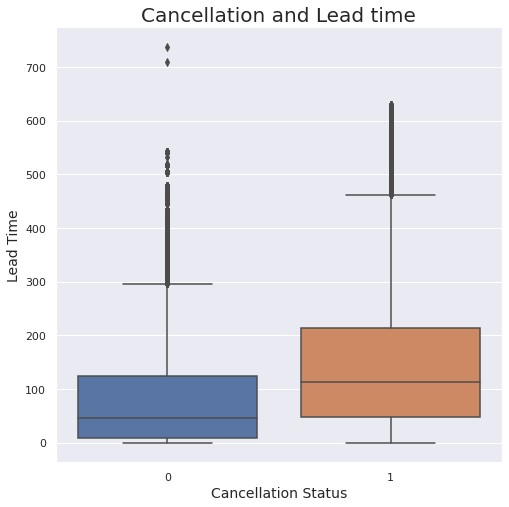

In [48]:
# depicting groups of Cancellation through their quartiles using boxplot
plt.figure(figsize=(8,8))
sns.set_theme(style="darkgrid",font='sans-serif')
plt.title("Cancellation and Lead time", fontsize=20)
sns.boxplot(x='is_canceled',y='lead_time',data=df_hotel)
plt.xlabel("Cancellation Status", fontsize=14)
plt.ylabel("Lead Time", fontsize=14)
plt.show()

(0.0, 120.0)

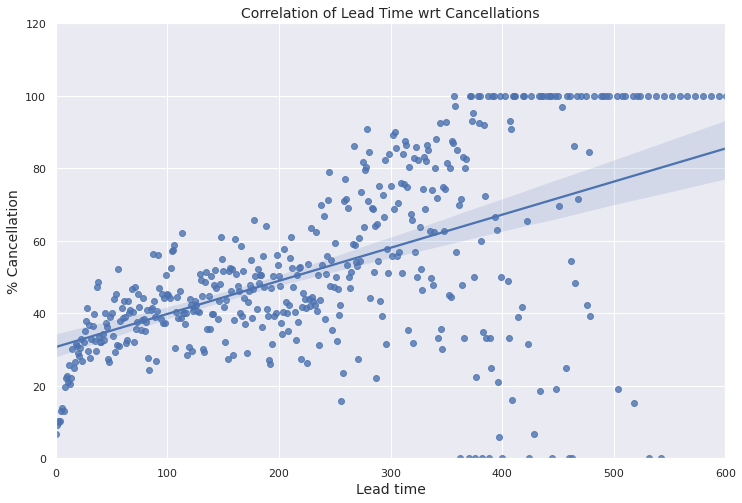

In [49]:
# get stastistical summary of lead time w.r.t cancelled bookings
lead_time_df = df_hotel.groupby('lead_time')['is_canceled'].describe()
plt.figure(figsize=(12, 8))

# plot correlation b/w lead time w.r.t cancelled booking
sns.regplot(x=lead_time_df.index, y=lead_time_df["mean"].values * 100)
plt.title("Correlation of Lead Time wrt Cancellations", fontsize=14)
plt.xlabel("Lead time", fontsize=14)
plt.ylabel("% Cancellation", fontsize=14)
plt.xlim(0,600)
plt.ylim(0,120)

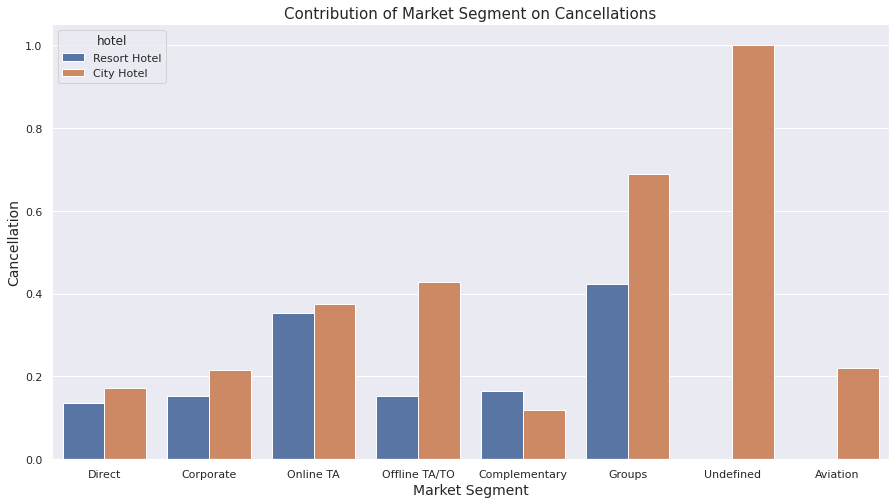

In [63]:
# Barplot for Market Segment w.r.t to cancelled bookings
plt.figure(figsize=(15, 8))
ax=sns.barplot(x="market_segment", y="is_canceled", hue="hotel", data=df_hotel,errwidth=0)
plt.title('Contribution of Market Segment on Cancellations',fontsize = 15)
plt.xlabel('Market Segment',fontsize = 14)
plt.ylabel('Cancellation',fontsize = 14)
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



Text(0, 0.5, 'No. of Cancellations')

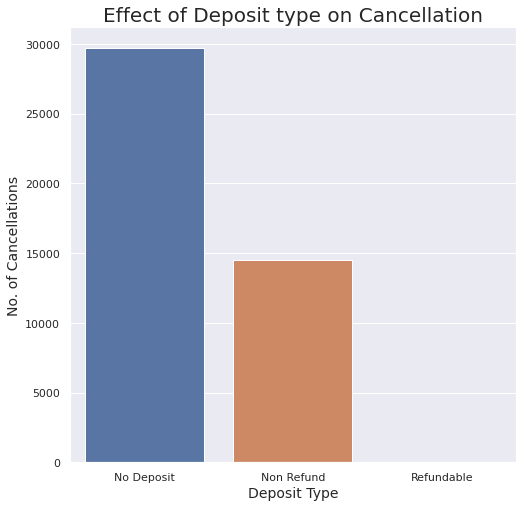

In [64]:
# Plot deposit type leading in cancelleation

# get stastistical summary of Deposite Type w.r.t cancelled booking
df_deposit_type = df_is_canceled.groupby('deposit_type')['is_canceled'].describe()
df_deposit_type

plt.figure(figsize=(8,8))
sns.set_theme(style="darkgrid",font='sans-serif')

# BarPlot deposit type leading in cancelleation
ax = sns.barplot(df_deposit_type.index, df_deposit_type["count"].values)
plt.title("Effect of Deposit type on Cancellation", fontsize=20)
plt.xlabel("Deposit Type", fontsize=14)
plt.ylabel("No. of Cancellations", fontsize=14)

## **Monthly Trends**

Text(0.5, 1.0, ' Montly Bookings Percentage  ')

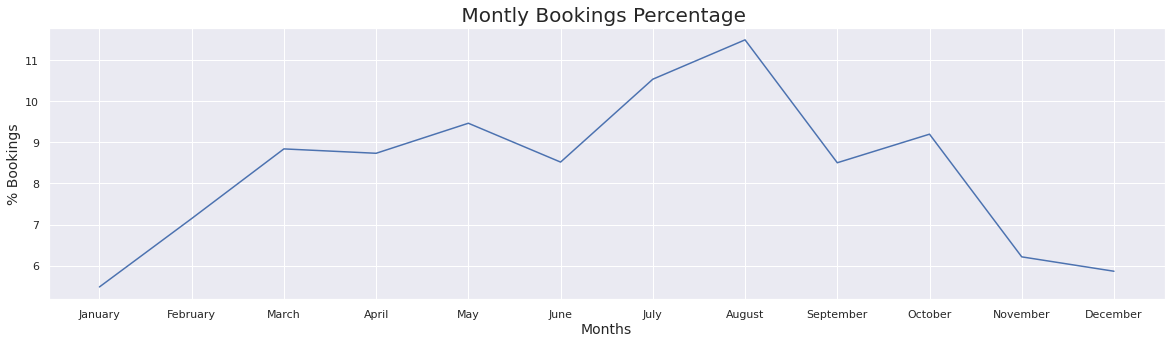

In [66]:
# Plot Monthly Bookings Percentage  

# month list
new_order = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September',
             'October', 'November', 'December']

#sorted arrival months
sorted_months = df_not_canceled['arrival_date_month'].value_counts().reindex(new_order)

different_months = sorted_months.index
montly_bookings_percentage = sorted_months/sorted_months.sum()*100

plt.figure(figsize=(20,5))
sns.set_theme(style="darkgrid",font='sans-serif')

# Draw Montly  linePlot Bookings Percentage
ax =sns.lineplot(x=different_months,y=montly_bookings_percentage,)
plt.ylabel("% Bookings", fontsize=14)
plt.xlabel("Months", fontsize=14)
plt.title(" Montly Bookings Percentage  ", fontsize=20)



/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



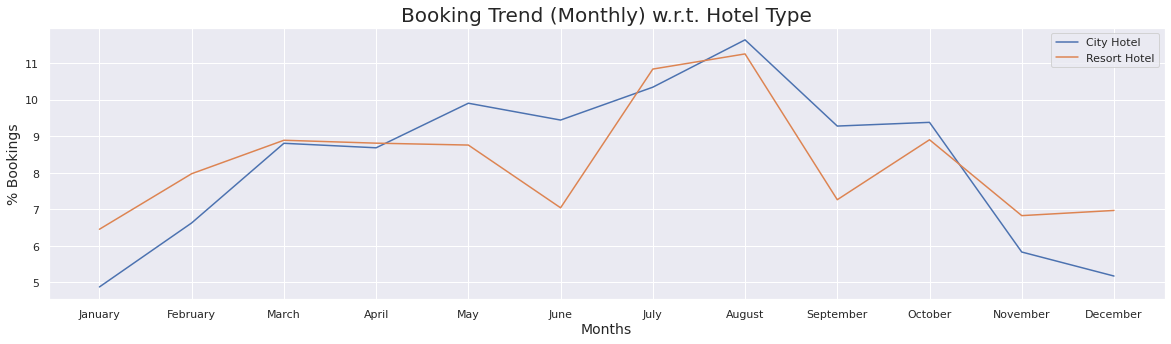

In [71]:
## Select only City Hotel
sorted_months = df_not_canceled.loc[df.hotel=='City Hotel' ,'arrival_date_month'].value_counts().reindex(new_order)

x1 = sorted_months.index
y1 = sorted_months/sorted_months.sum()*100

## Select only Resort Hotel
sorted_months = df_not_canceled.loc[df.hotel=='Resort Hotel' ,'arrival_date_month'].value_counts().reindex(new_order)

x2 = sorted_months.index
y2 = sorted_months/sorted_months.sum()*100

## Draw the line plot
sns.set_theme(style="darkgrid",font='sans-serif')
fig, ax = plt.subplots(figsize=(20,5))
ax.set_xlabel('Months',fontsize=14)
ax.set_ylabel("% Bookings", fontsize=14)
ax.set_title('Booking Trend (Monthly) w.r.t. Hotel Type', fontsize=20)
sns.lineplot(x1, y1.values, label='City Hotel', sort=False)
sns.lineplot(x1, y2.values, label='Resort Hotel', sort=False)
plt.show()

Text(0.5, 1.0, 'Number of Arrivals / Hotel')

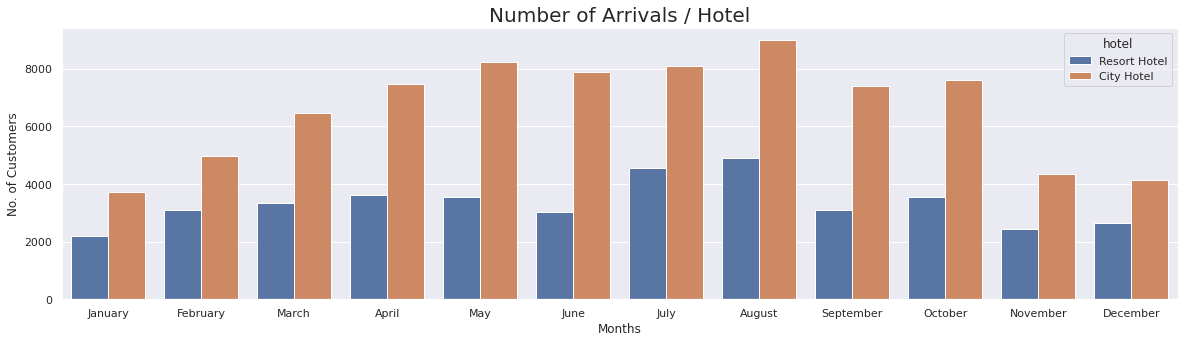

In [130]:
# Compare arrival months w.r.t to hotels using barPlot

plt.figure(figsize=(20,5)) 
sns.set_theme(style="darkgrid",font='sans-serif')
ax =sns.countplot(data = df_hotel, x = 'arrival_date_month', hue = 'hotel', order =new_order)
plt.ylabel("No. of Customers", fontsize=12)
plt.xlabel("Months", fontsize=12)
plt.title("Number of Arrivals / Hotel",fontsize=20)


## **Yearly Trend**

Text(0, 0.5, 'No. of Bookings')

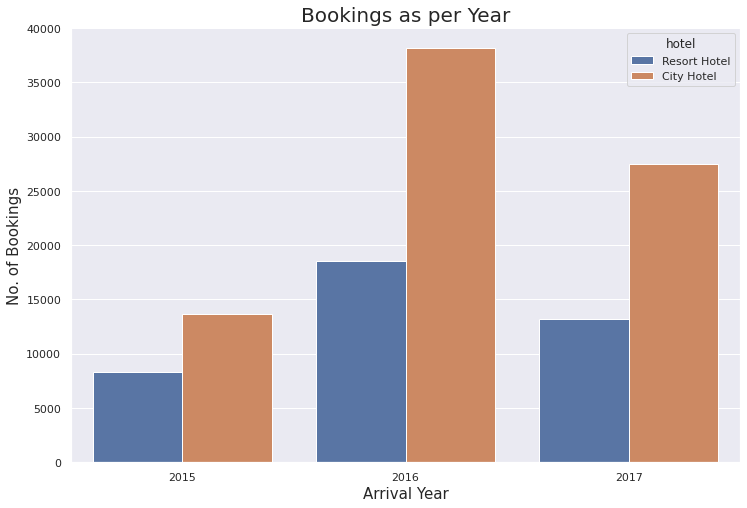

In [74]:
#  Arrival date year bar plot
plt.figure(figsize=(12,8))
sns.set_theme(style="darkgrid",font='sans-serif')
sns.countplot(data=df_hotel, x='arrival_date_year', hue='hotel').set_title('Bookings as per Year', fontsize=20)
plt.xlabel('Arrival Year', fontsize=15)
plt.ylabel('No. of Bookings', fontsize=15)

## **Duration of stay**

Text(0.5, 1.0, 'Hotel wise night stay duration (Top 10)')

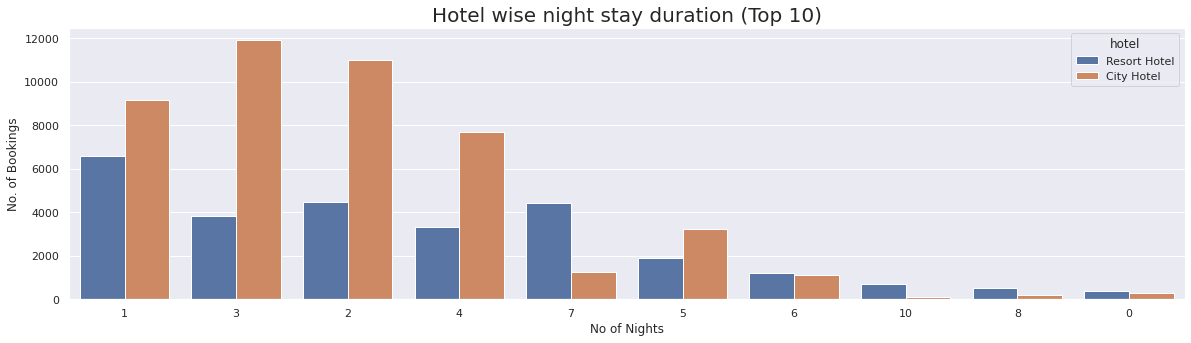

In [76]:
# total night stays
df_not_canceled.loc[:,'total_nights'] = df_not_canceled['stays_in_weekend_nights']+ df_not_canceled['stays_in_week_nights']
plt.figure(figsize=(20,5))

#plot top 10 Hotel wise night stays
ax=sns.countplot(x='total_nights', hue='hotel', data=df_not_canceled, order = df_not_canceled.total_nights.value_counts(sort=True).iloc[:10].index)
plt.xlabel('No of Nights',fontsize=12)
plt.ylabel('No. of Bookings',fontsize=12)
plt.title('Hotel wise night stay duration (Top 10)',fontsize=20)


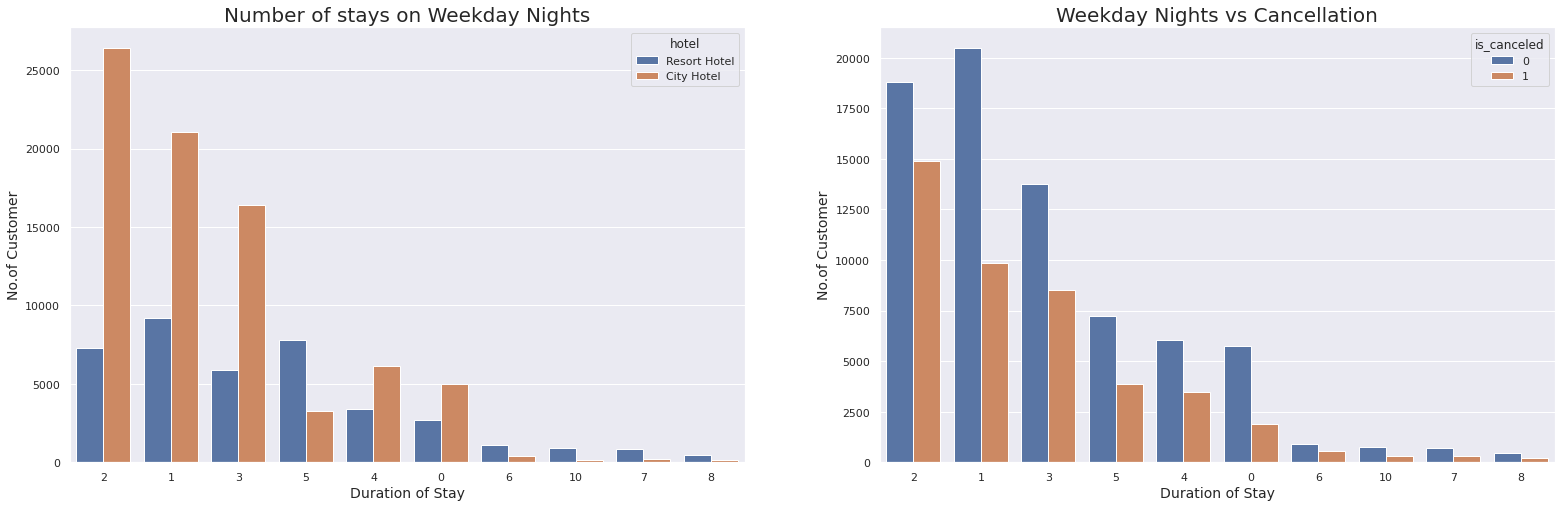

In [84]:
sns.set_theme(style="darkgrid",font='sans-serif')
plt.figure(figsize=(15, 8))

# plot hotel wise stays in weekday nights
plt.subplot(1, 2, 1)
ax=sns.countplot(x='stays_in_week_nights',hue='hotel', data=df_hotel, order = df_hotel.stays_in_week_nights.value_counts(sort=True).iloc[:10].index)
plt.ylabel("No.of Customer", fontsize=14)
plt.xlabel("Duration of Stay", fontsize=14)
plt.title("Number of stays on Weekday Nights",fontsize=20)

# plot comparison b/w hotel wise weekday stays and cancellation 
plt.subplot(1, 2, 2)
ax=sns.countplot(data = df_hotel, x = 'stays_in_week_nights', hue='is_canceled',order = df_hotel.stays_in_week_nights.value_counts(sort=True).iloc[:10].index)
plt.ylabel("No.of Customer", fontsize=14)
plt.xlabel("Duration of Stay", fontsize=14)
plt.title('Weekday Nights vs Cancellation',fontsize=20)

plt.subplots_adjust(right=1.5)
plt.show()

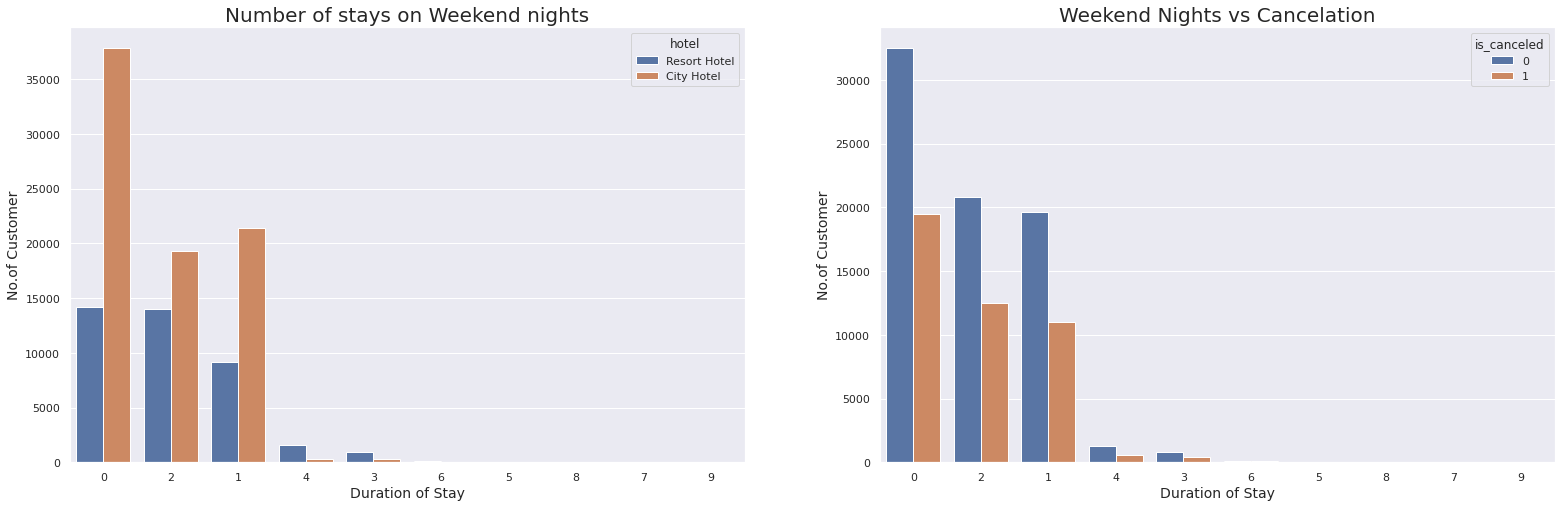

In [131]:
sns.set_theme(style="darkgrid",font='sans-serif')
plt.figure(figsize=(15, 8))

plt.subplot(1, 2, 1)
ax=sns.countplot(x='stays_in_weekend_nights',hue='hotel', data=df_hotel, order = df_hotel.stays_in_weekend_nights.value_counts(sort=True).iloc[:10].index)
plt.ylabel("No.of Customer", fontsize=14)
plt.xlabel("Duration of Stay", fontsize=14)
plt.title("Number of stays on Weekend nights", fontsize=20)

plt.subplot(1, 2, 2)
ax=sns.countplot(data = df_hotel, x = 'stays_in_weekend_nights', hue='is_canceled', order = df_hotel.stays_in_weekend_nights.value_counts(sort=True).iloc[:10].index)
plt.ylabel("No.of Customer", fontsize=14)
plt.xlabel("Duration of Stay", fontsize=14)
plt.title('Weekend Nights vs Cancelation', fontsize=20)
plt.subplots_adjust(right=1.5)

plt.show()

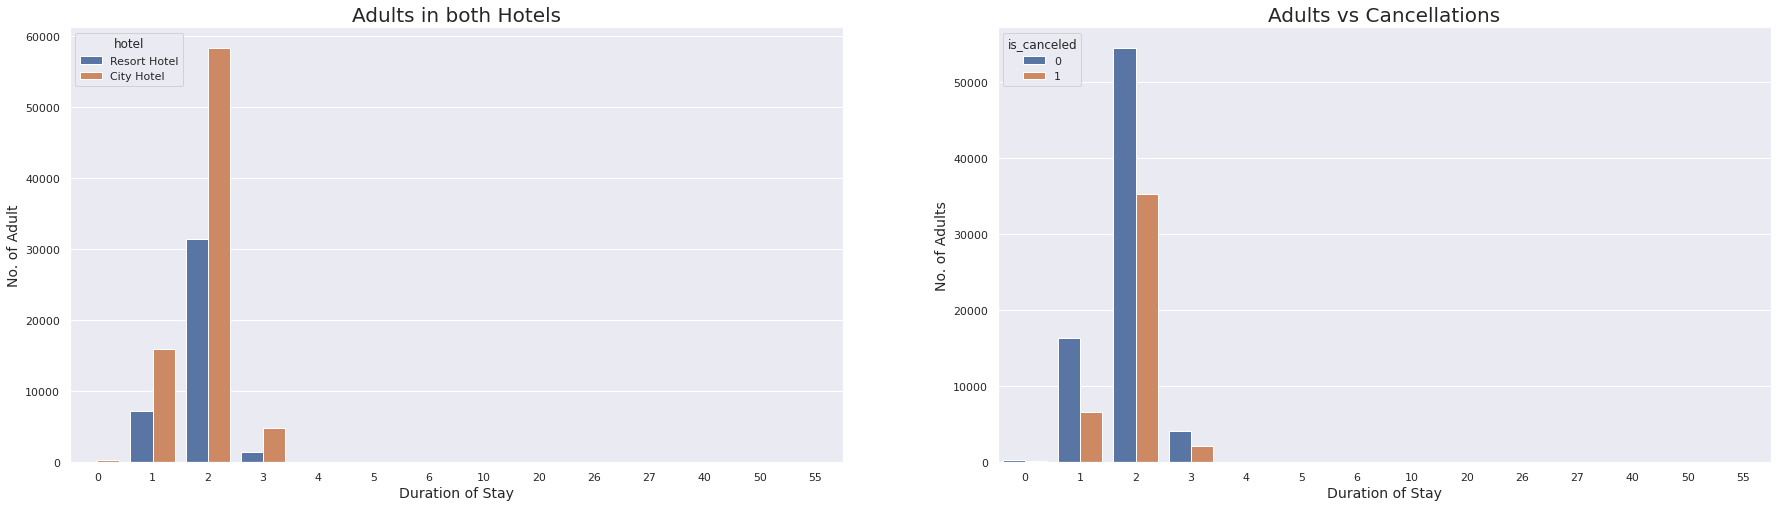

In [89]:
sns.set_theme(style="darkgrid",font='sans-serif')
plt.figure(figsize=(15, 8))

plt.subplot(1, 2, 1)
ax=sns.countplot(x='adults',hue='hotel', data=df_hotel)
plt.ylabel("No. of Adult", fontsize=14)
plt.xlabel("Duration of Stay", fontsize=14)
plt.title("Adults in both Hotels",fontsize=20)

plt.subplot(1, 2, 2)
ax= sns.countplot(data = df_hotel, x = 'adults', hue='is_canceled')
plt.ylabel("No. of Adults", fontsize=14)
plt.xlabel("Duration of Stay", fontsize=14)
plt.title('Adults vs Cancellations',fontsize=20)

plt.subplots_adjust(right=1.7)
plt.show()

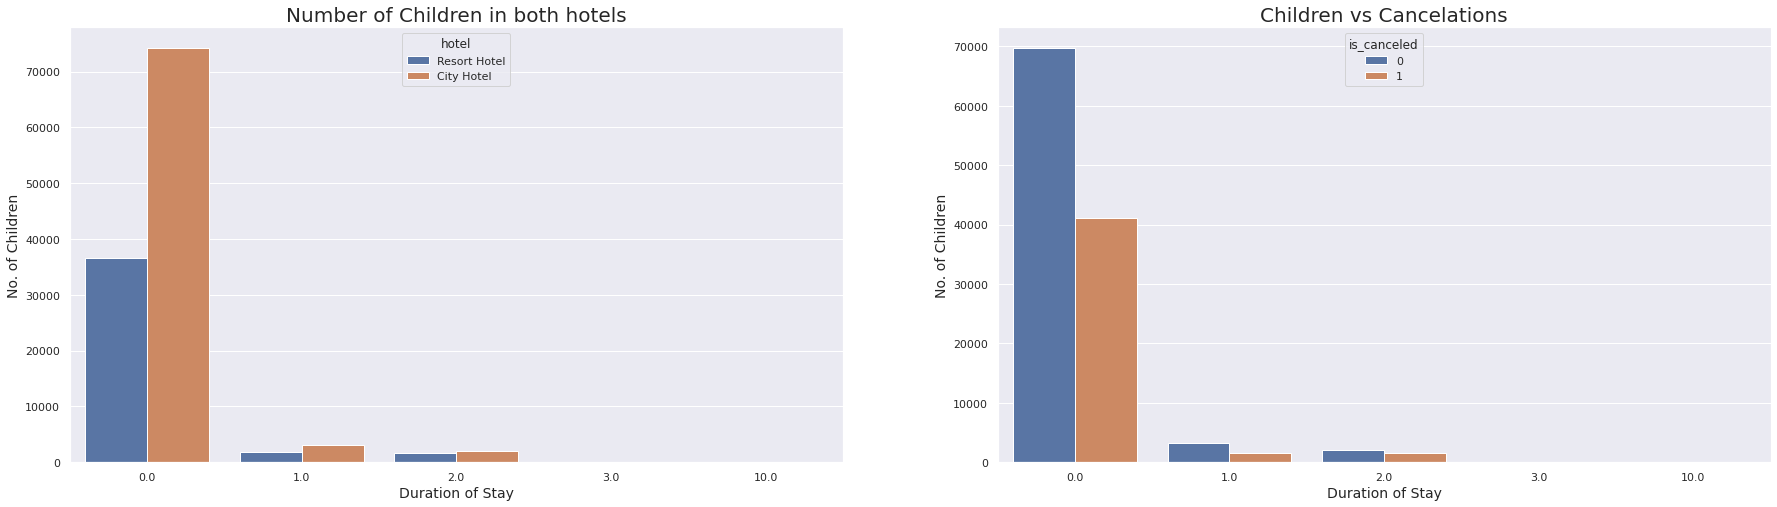

In [94]:
plt.figure(figsize=(15, 8))

plt.subplot(1, 2, 1)
ax=sns.countplot(x='children',hue='hotel', data=df_hotel)
plt.ylabel("No. of Children", fontsize=14)
plt.xlabel("Duration of Stay", fontsize=14)
plt.title("Number of Children in both hotels",fontsize=20)

plt.subplot(1, 2, 2)
ax=sns.countplot(data = df_hotel, x = 'children', hue='is_canceled')
plt.ylabel("No. of Children", fontsize=14)
plt.xlabel("Duration of Stay", fontsize=14)
plt.title('Children vs Cancelations',fontsize=20)

plt.subplots_adjust(right=1.7)
plt.show()

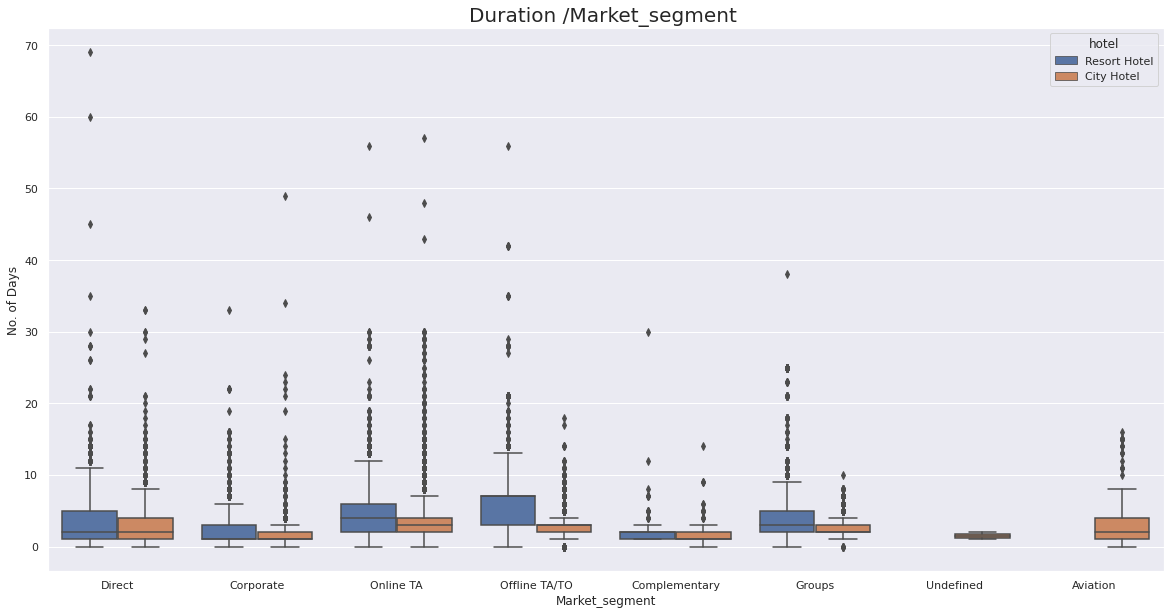

In [96]:
df_hotel["duration"]= df_hotel['stays_in_weekend_nights']+df_hotel['stays_in_week_nights']
plt.figure(figsize = (20,10))
ax=sns.boxplot(x = 'market_segment', y = 'duration', data = df_hotel, hue = 'hotel');
plt.ylabel("No. of Days", fontsize=12)
plt.xlabel("Market_segment", fontsize=12)
plt.title('Duration /Market_segment ',fontsize=20)

plt.show()

## **Geographical Analysis**

Text(0.5, 1.0, 'Country Wise Distribution of Bookings')

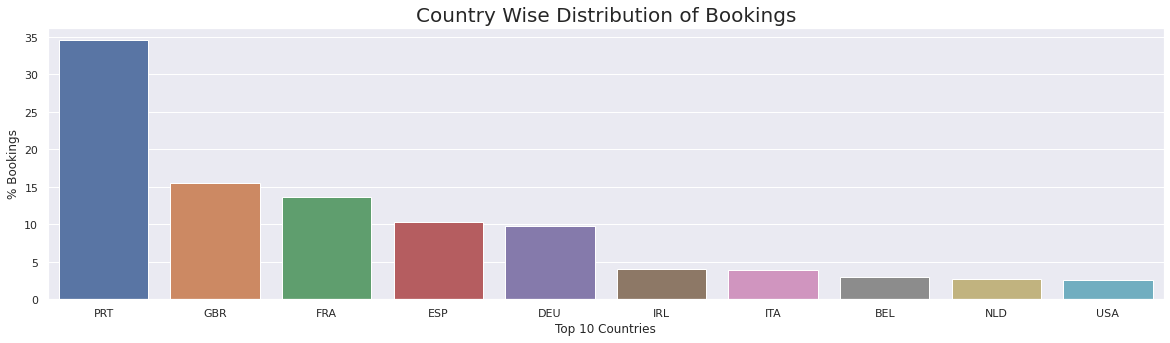

In [99]:
Countries,percetage_bookings=get_percentage(df_not_canceled['country'], limit=10)
plt.figure(figsize=(20,5))
ax=sns.barplot(x=Countries,y=percetage_bookings)
plt.ylabel("% Bookings", fontsize=12)
plt.xlabel("Top 10 Countries", fontsize=12)
plt.title("Country Wise Distribution of Bookings",fontsize=20)

In [100]:
#Graphing booking data by country of origin

country_visitors = df_not_canceled.groupby('country').size().reset_index(name = 'count')

# We will be using Plotly.express to plot a choropleth map. 
import plotly.express as px


px.choropleth(country_visitors,
                    locations = "country",
                    color= np.log(country_visitors['count']), 
                    hover_name= "country", # column to add to hover information
                    color_continuous_scale=px.colors.sequential.Viridis,
                    title="Home country of visitors")



## **ADR Analysis**

In [147]:
#adr analysis
city_data = df_hotel[df_hotel["hotel"]=="City Hotel"]
resort_data = df_hotel[df_hotel["hotel"]=="Resort Hotel"]

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



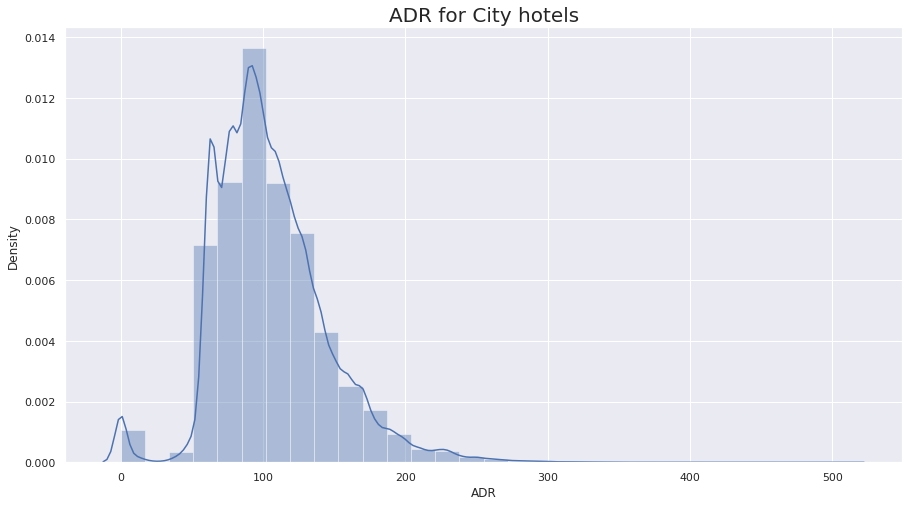

In [148]:
plt.figure(figsize=(15, 8))
ax=sns.distplot(city_data[city_data["adr"]<=1000]["adr"],bins=30)
plt.ylabel("Density", fontsize=12)
plt.xlabel("ADR", fontsize=12)
plt.title("ADR for City hotels",fontsize=20)

plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



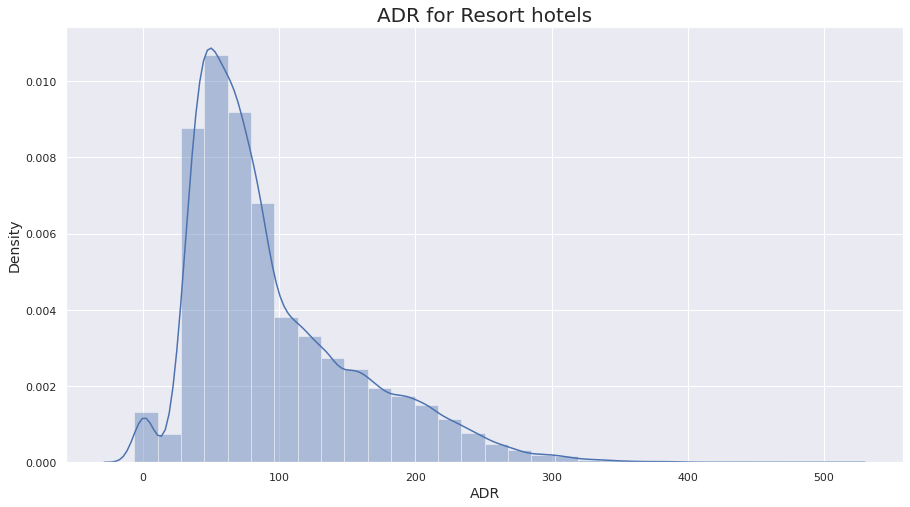

In [149]:
plt.figure(figsize=(15, 8))
ax=sns.distplot(resort_data[resort_data["adr"]<=1000]["adr"],bins=30)
plt.ylabel("Density", fontsize=14)
plt.xlabel("ADR", fontsize=14)
plt.title("ADR for Resort hotels",fontsize=20)

plt.show()

In [150]:
#let's see monthly adr data
mon_city_adr = city_data.groupby("arrival_date_month")["adr"].describe()
mon_city_adr = mon_city_adr.reindex(new_order)
mon_city_adr

,count,mean,std,min,25%,50%,75%,max
arrival_date_month,,,,,,,,
January,3736.0,82.628986,25.350968,0.0,70.00,80.00,91.7025,284.20
February,4965.0,85.088278,28.781711,0.0,74.70,80.00,93.6000,284.20
March,6458.0,92.643116,72.889867,0.0,75.00,88.00,102.0000,5400.00
April,7480.0,111.251838,36.128762,0.0,90.00,105.00,127.5000,336.00
May,8232.0,121.638560,39.966153,0.0,97.02,120.00,140.4000,510.00
June,7894.0,119.074341,36.084648,0.0,96.30,117.37,135.0000,333.67
July,8088.0,110.734292,41.898966,0.0,82.00,107.10,134.3000,365.00
August,8983.0,114.680455,45.974009,0.0,81.00,109.00,140.0000,372.33
September,7400.0,110.004661,41.910098,0.0,80.00,107.00,135.9000,345.00


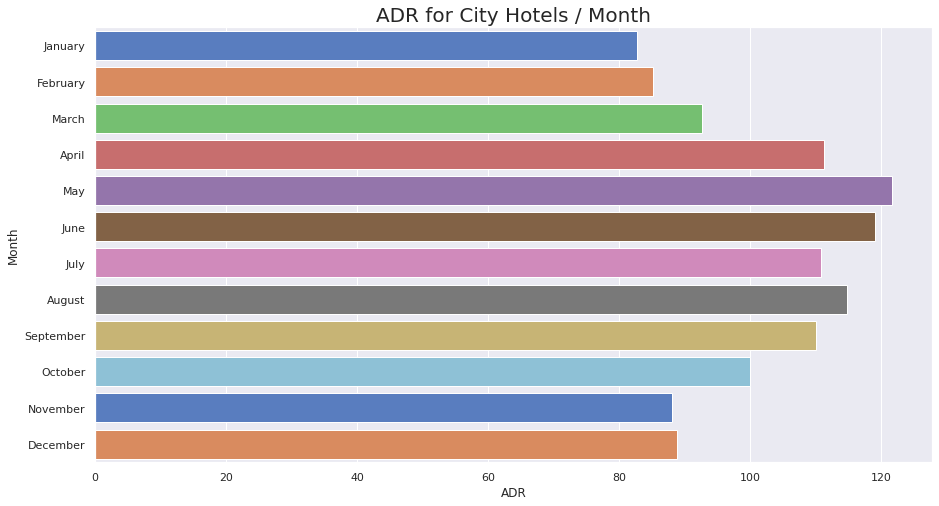

In [151]:
plt.figure(figsize=(15, 8))
ax=sns.barplot(x=mon_city_adr["mean"],y=mon_city_adr.index,palette='muted')
plt.ylabel("Month", fontsize=12)
plt.xlabel("ADR", fontsize=12)
plt.title("ADR for City Hotels / Month",fontsize=20)
plt.show()

In [152]:
mon_resort_adr = resort_data.groupby("arrival_date_month")["adr"].describe()
mon_resort_adr = mon_resort_adr.reindex(new_order)
mon_resort_adr

,count,mean,std,min,25%,50%,75%,max
arrival_date_month,,,,,,,,
January,2193.0,49.461883,19.711653,0.00,38.0000,47.600,58.0000,149.00
February,3103.0,55.171930,21.872480,0.00,40.0000,51.000,68.0000,174.00
March,3336.0,57.520147,24.331359,-6.38,40.0000,55.600,70.4000,193.71
April,3609.0,77.849496,32.007703,0.00,55.1000,75.000,90.0000,270.00
May,3559.0,78.758134,33.351698,0.00,55.1000,73.000,94.0000,225.50
June,3045.0,110.444749,44.408189,0.00,76.5000,105.000,138.0000,318.82
July,4573.0,155.181299,56.022916,0.00,116.5000,152.500,192.0000,508.00
August,4894.0,186.790574,59.450543,0.00,143.7975,188.420,225.6525,450.00
September,3108.0,93.252030,43.283535,0.00,65.0000,86.000,117.8025,307.50


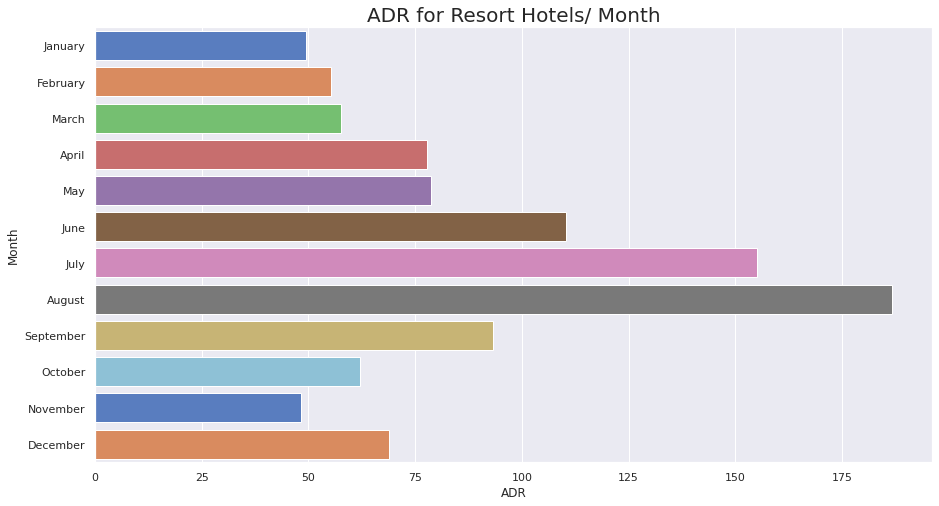

In [153]:
plt.figure(figsize=(15, 8))
ax=sns.barplot(x=mon_resort_adr["mean"],y=mon_resort_adr.index,palette='muted')
plt.ylabel("Month", fontsize=12)
plt.xlabel("ADR", fontsize=12)
plt.title("ADR for Resort Hotels/ Month",fontsize=20)
plt.show()


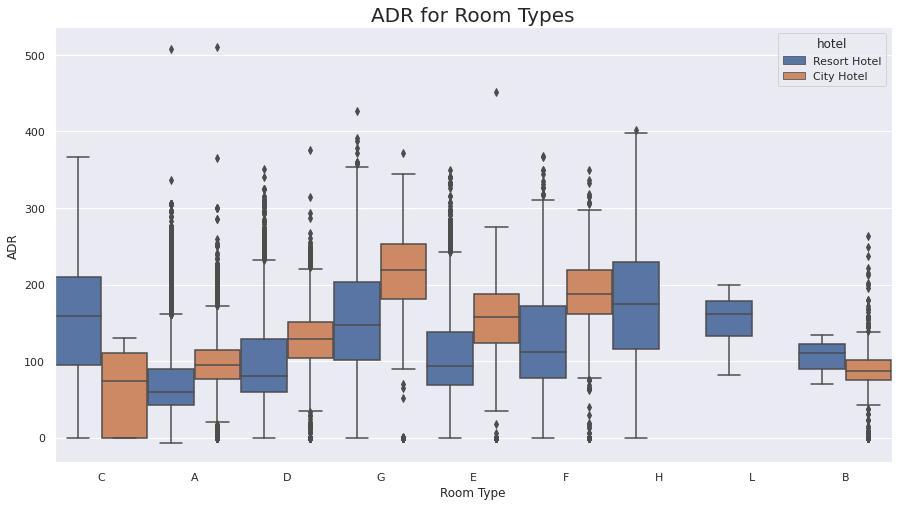

In [154]:
plt.figure(figsize=(15, 8))
ax=sns.boxplot(x = 'reserved_room_type', y = 'adr',data=df_not_canceled,hue='hotel',width =1)
plt.ylabel("ADR", fontsize=12)
plt.xlabel("Room Type", fontsize=12)
plt.title("ADR for Room Types",fontsize=20)
plt.show()


## **Revenue Analysis**

In [110]:
#revenue_analysis
df_hotel["duration"]= df_hotel['stays_in_weekend_nights']+df_hotel['stays_in_week_nights']
df_hotel["duration"]


0         0
1         0
2         1
3         1
4         2
         ..
119385    7
119386    7
119387    7
119388    7
119389    9
Name: duration, Length: 119390, dtype: int64

In [114]:
df_hotel["revenue"] = df_hotel["adr"]*df_hotel["duration"]
city_data = df_hotel[df_hotel["hotel"]=="City Hotel"]
resort_data = df_hotel[df_hotel["hotel"]=="Resort Hotel"]

In [115]:
city_data["revenue"].describe()

count    79330.000000
mean       318.662170
std        244.555445
min          0.000000
25%        160.000000
50%        264.000000
75%        401.200000
max       6148.000000
Name: revenue, dtype: float64

In [116]:
city_data["revenue"].sum()

25279469.959999997

In [117]:
mon_city_rev = city_data.groupby("arrival_date_month").sum()["revenue"]
mon_city_rev = mon_city_rev.reindex(new_order)
mon_city_rev

arrival_date_month
January       955659.46
February     1290179.65
March        1826875.23
April        2577342.25
May          2892122.22
June         2770764.43
July         2846445.30
August       3291650.58
September    2343765.62
October      2121356.75
November     1168201.39
December     1195107.08
Name: revenue, dtype: float64

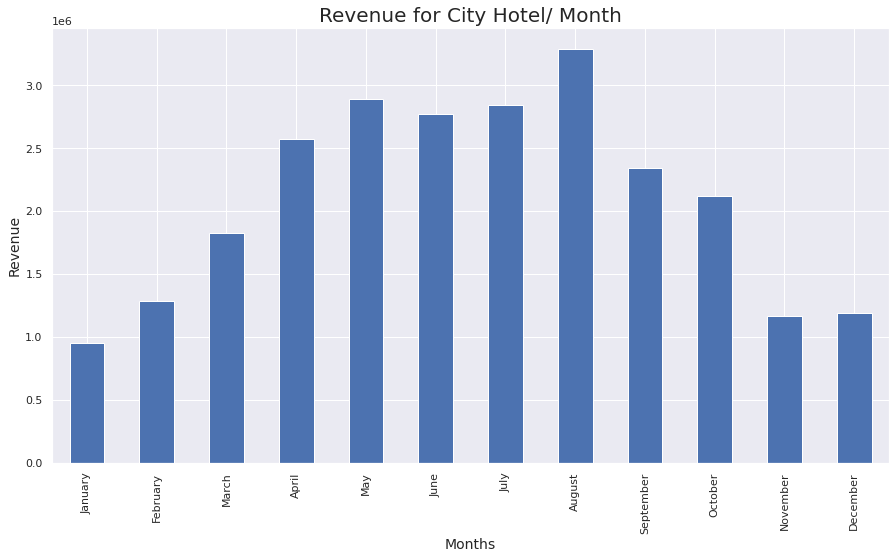

In [119]:
plt.figure(figsize=(15, 8))
ax=mon_city_rev.plot.bar()
plt.ylabel("Revenue", fontsize=14)
plt.xlabel("Months", fontsize=14)
plt.title("Revenue for City Hotel/ Month",fontsize=20)
plt.show()


In [120]:
city_roi = city_data.groupby("distribution_channel").sum()["revenue"]
city_roi

distribution_channel
Corporate      602745.13
Direct        2174185.14
GDS             45997.42
TA/TO        22455934.77
Undefined         607.50
Name: revenue, dtype: float64

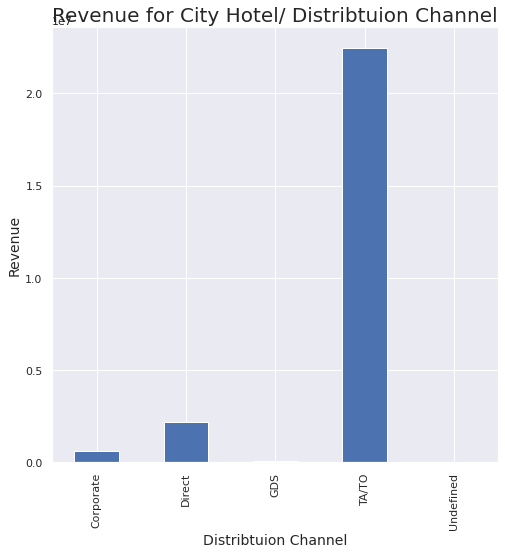

In [121]:
plt.figure(figsize=(8, 8))
ax=city_roi.plot.bar()
plt.ylabel("Revenue", fontsize=14)
plt.xlabel("Distribtuion Channel", fontsize=14)
plt.title("Revenue for City Hotel/ Distribtuion Channel",fontsize=20)
plt.show()


In [122]:
mon_resort_rev = resort_data.groupby("arrival_date_month").sum()["revenue"]
mon_resort_rev = mon_resort_rev.reindex(new_order)
mon_resort_rev

arrival_date_month
January       317417.97
February      528793.05
March         812345.86
April        1133123.89
May          1216003.68
June         1728622.85
July         3741268.34
August       4653066.85
September    1388151.56
October       888192.75
November      431955.15
December      605085.62
Name: revenue, dtype: float64

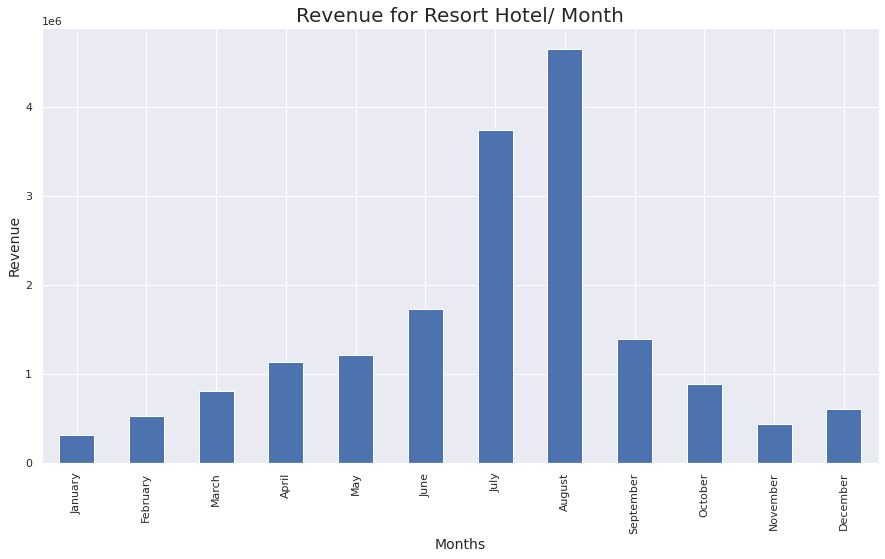

In [123]:
plt.figure(figsize=(15, 8))
ax= mon_resort_rev.plot.bar()
plt.ylabel("Revenue", fontsize=14)
plt.xlabel("Months", fontsize=14)
plt.title("Revenue for Resort Hotel/ Month",fontsize=20)
plt.show()

In [124]:
resort_roi = resort_data.groupby("distribution_channel").sum()["revenue"]
resort_roi

distribution_channel
Corporate      511348.33
Direct        3291915.66
TA/TO        13640200.08
Undefined         563.50
Name: revenue, dtype: float64

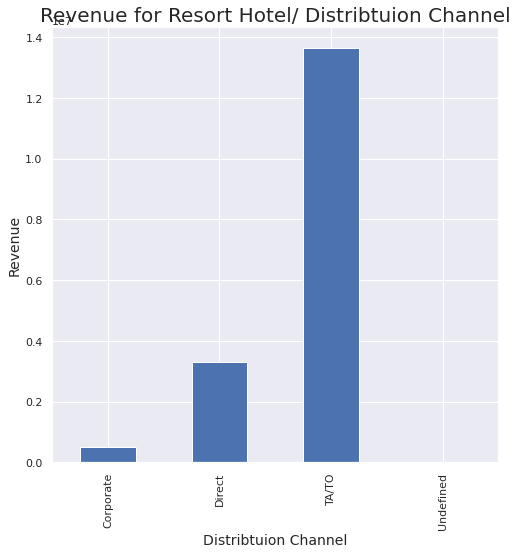

In [125]:
plt.figure(figsize=(8, 8))
ax=resort_roi.plot.bar()
plt.ylabel("Revenue", fontsize=14)
plt.xlabel("Distribtuion Channel", fontsize=14)
plt.title("Revenue for Resort Hotel/ Distribtuion Channel",fontsize=20)
plt.show()


## **Customer Analysis**

**Demographics** </h3>

Assumptions made:<br>
Single - 1 Adult, 0 Children , 0 Babies<br>
Couple - 2 Adult, 0 Children , 0 Babies<br>
Family - Adult + Children + Babies = 3 or greater than 3<br>


In [126]:
bookings = df_hotel[df_hotel['is_canceled']==0].shape[0]
single = df_hotel[df_hotel['is_canceled']==0][(df_hotel['adults']==1) & (df_hotel['children'] == 0) & (df_hotel['babies'] == 0)]
couple = df_hotel[df_hotel['is_canceled']==0][(df_hotel['adults']==2) & (df_hotel['children'] == 0) & (df_hotel['babies'] == 0)]
family = df_hotel[df_hotel['is_canceled']==0][(df_hotel['adults']) + (df_hotel['children']) + (df_hotel['babies'] ) > 2]

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: UserWarning:

Boolean Series key will be reindexed to match DataFrame index.

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: UserWarning:

Boolean Series key will be reindexed to match DataFrame index.

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: UserWarning:

Boolean Series key will be reindexed to match DataFrame index.



In [127]:
df_hotel[df_hotel['is_canceled']==0].shape[0]

75166

In [128]:
list_type = [single,couple,family]
accomodation_type = ['Single','Couple','Family']
percentage = []
for val in list_type:
  percentage.append(round(len(val)*100/bookings))
#percentage
#dict_ = {"Accomodation Type":accomodation_type, "Accomodaation percentage":percentage}
df_accomodation_percent =pd.DataFrame({"Accomodation_Type":accomodation_type, "Accomodation_percentage":percentage})
df_accomodation_percent

,Accomodation_Type,Accomodation_percentage
0,Single,21
1,Couple,65
2,Family,13


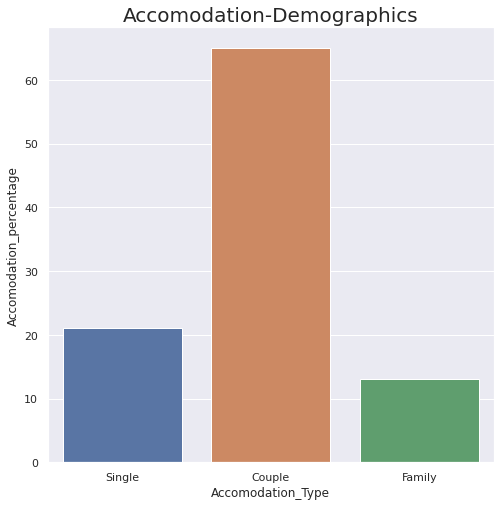

In [129]:
plt.figure(figsize=(8,8))                   
sns.set_theme(style="darkgrid",font='sans-serif')
ax = sns.barplot(x="Accomodation_Type", y="Accomodation_percentage", data = df_accomodation_percent).set_title('Accomodation-Demographics', fontsize=20)

Summary:<br>
From the Bar plot we can say that **Couple booked Most No. of Hotels** and **Family booked Least No. of Hotels**

**Customer Type**

Text(0.5, 1.0, 'Types of guests')

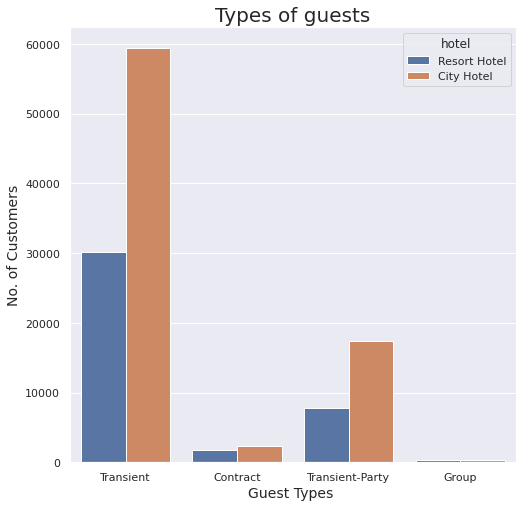

In [133]:
#graph types of guests
plt.figure(figsize=(8,8))
sns.set_theme(style="darkgrid",font='sans-serif')
ax =sns.countplot(data = df, x = 'customer_type',hue='hotel')
plt.xlabel("Guest Types ", fontsize=14)
plt.ylabel("No. of Customers", fontsize=14)
plt.title("Types of guests", fontsize=20)


**Repeated Guests**

Text(0.5, 1.0, ' Repeated Guests / Hotel Type ')

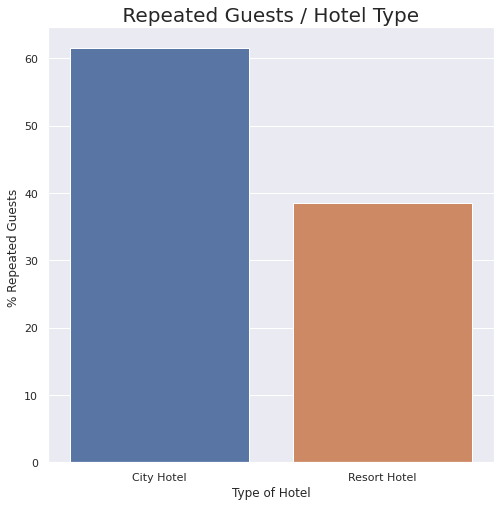

In [137]:
#distribution of repeated guest hotel wise

series=df_not_canceled.groupby('hotel')["is_repeated_guest"].count()
hotel_type=series.index
count_percent_repeated_guest=series.values/series.values.sum()*100

plt.figure(figsize=(8,8))
sns.set_theme(style="darkgrid",font='sans-serif')
ax = sns.barplot(x=hotel_type,y=count_percent_repeated_guest)
plt.ylabel("% Repeated Guests ", fontsize=12)
plt.xlabel("Type of Hotel", fontsize=12)
plt.title(" Repeated Guests / Hotel Type ", fontsize=20)


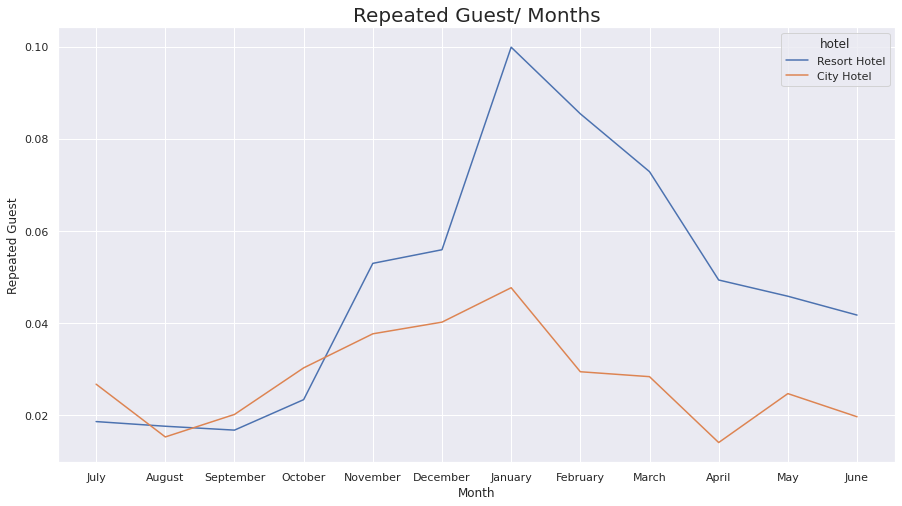

In [139]:
plt.figure(figsize=(15, 8))
sns.lineplot(x = "arrival_date_month", y="is_repeated_guest", hue="hotel", data=df_hotel, ci=None).set_title('Repeated Guest/ Months', fontsize=20)
sns.set_theme(style="darkgrid",font='sans-serif')
plt.xlabel('Month', fontsize = 12)
plt.ylabel('Repeated Guest', fontsize=12)
plt.show()

**Special Requests**

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



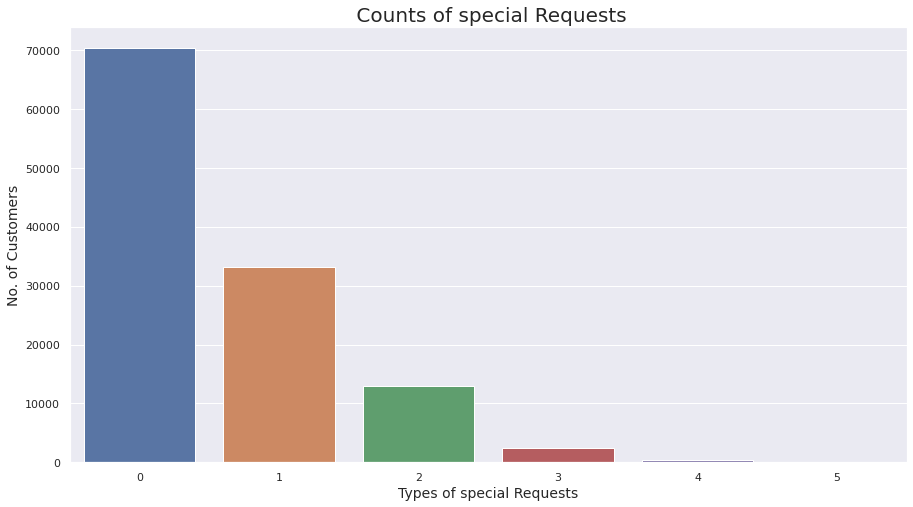

In [136]:
plt.figure(figsize=(15, 8))
ax=sns.countplot(df_hotel["total_of_special_requests"])
plt.ylabel("No. of Customers", fontsize=14)
plt.xlabel("Types of special Requests", fontsize=14)
plt.title(" Counts of special Requests",fontsize=20)
plt.show()

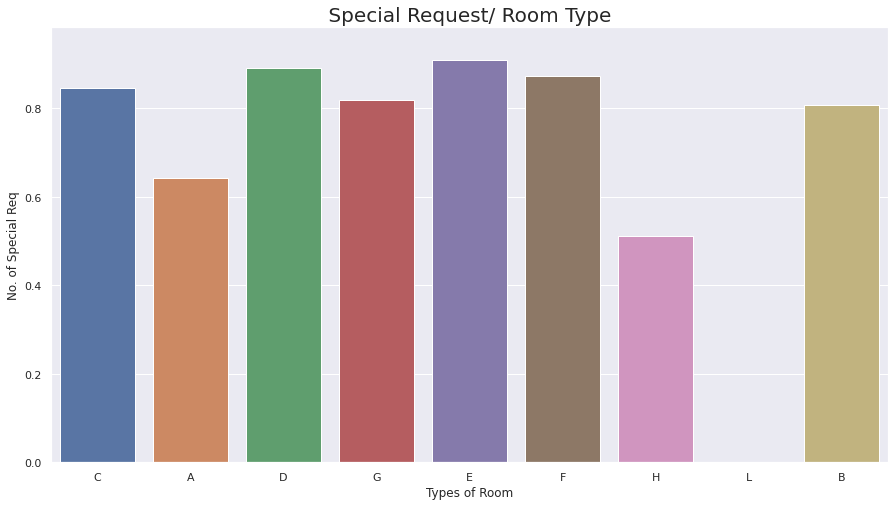

In [141]:
plt.figure(figsize=(15,8))
sns.set_theme(style="darkgrid",font='sans-serif')
ax=sns.barplot(y= "total_of_special_requests", x= "reserved_room_type", data=df_not_canceled,errwidth=0)
plt.xlabel('Types of Room',fontsize=12)
plt.ylabel('No. of Special Req',fontsize=12)
plt.title(" Special Request/ Room Type ",fontsize=20)
plt.show()



In [142]:
single.groupby('hotel')['total_of_special_requests'].sum().reset_index()
couple.groupby('hotel')['total_of_special_requests'].sum().reset_index()
family.groupby('hotel')['total_of_special_requests'].sum().reset_index()


,hotel,total_of_special_requests
0,City Hotel,7330
1,Resort Hotel,3243


In [143]:
city_bar = [4212,22362,7330]
resort_bar = [1967, 14152, 3243]
width_bar = 0.25

range1 = np.arange(len(city_bar))
range2 = [val + width_bar for val in range1]

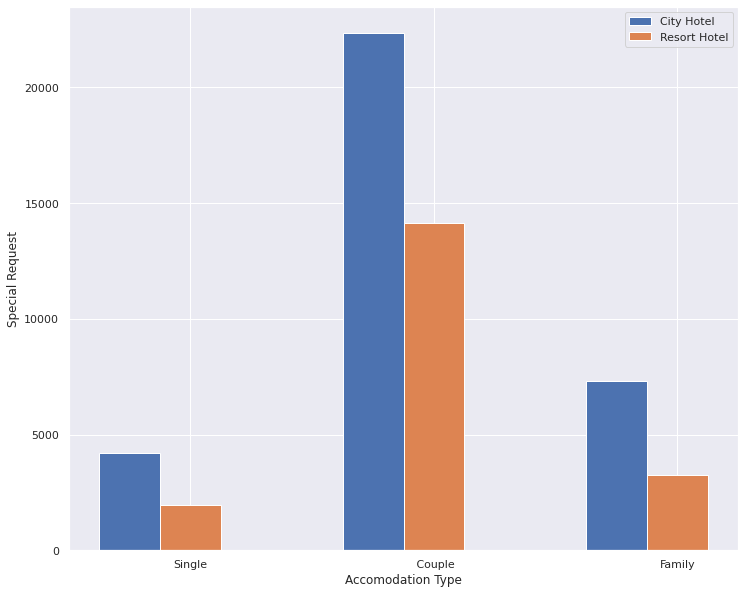

In [144]:
plt.figure(figsize=(12,10))
plt.bar(range1, city_bar, width=width_bar, label='City Hotel')
plt.bar(range2, resort_bar, width=width_bar,label='Resort Hotel')
plt.xticks([val + width_bar for val in range(len(city_bar))], ['Single',' Couple','Family'])
plt.xlabel('Accomodation Type')
plt.ylabel('Special Request')
plt.legend(loc = 'best')
plt.show()

**Meals**

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



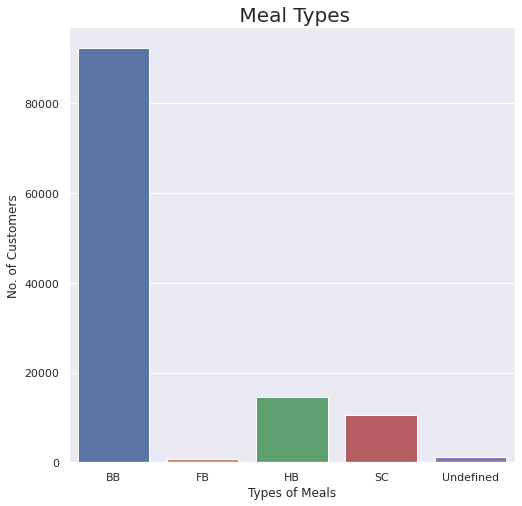

In [146]:
plt.figure(figsize=(8, 8))
ax=sns.countplot(df_hotel["meal"])
plt.ylabel("No. of Customers", fontsize=12)
plt.xlabel("Types of Meals", fontsize=12)
plt.title(" Meal Types",fontsize=20)
plt.show()



**Booking Channels**

In [ ]:
#Most popular booking channel 
#Travel agents and tour operators are bring in most of the visitors 
plt.figure(figsize=(8, 8))
ax=sns.countplot(df2["distribution_channel"])
plt.ylabel("Counts", fontsize=12)
plt.xlabel("Types of Channels", fontsize=12)
plt.title(" Counts of Bookings/ Channel ",fontsize=20)
plt.show()




**Market Segment**

In [ ]:
#Most popular market segment 
#travel agents are most represented among our visitors as well 

plt.figure(figsize=(8, 8))
ax=sns.countplot(df2["market_segment"])
plt.xticks(rotation=50)
plt.ylabel("Counts", fontsize=12)
plt.xlabel("Types of Market Segments", fontsize=12)
plt.title(" Counts of Bookings/ Market Segments ",fontsize=20)
plt.show()





**`Lead Time `**

In [ ]:
#lead time for booking 

plt.figure(figsize=(15, 8))
ax=sns.distplot(df2['lead_time'],bins=30)
plt.ylabel("Density ", fontsize=12)
plt.xlabel("Lead Time", fontsize=12)
plt.title("Lead Time Analysis ",fontsize=20)
plt.show()


**Deposit Type**

In [ ]:
#graphing deposit types
plt.figure(figsize=(8, 8))
ax=sns.countplot(data = df2, x = 'deposit_type', hue='hotel')
plt.ylabel("Count", fontsize=12)
plt.xlabel("Depostits", fontsize=12)
plt.title("Types of deposits ",fontsize=20)
plt.show()
